<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Or Shmuel 
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 4/7/2024 at 23:59

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [1]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [2]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

C:\Users\orshm\AppData\Local\Temp\ipykernel_32780\1871301639.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


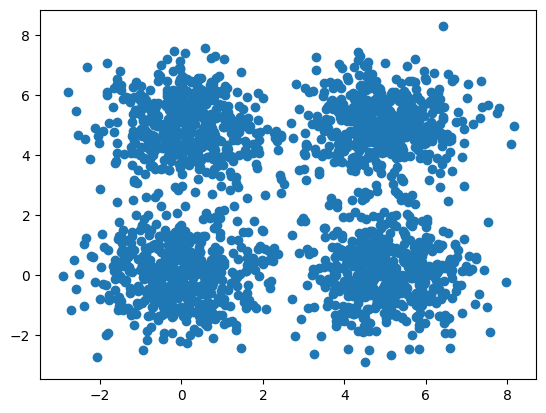

In [3]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [4]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        #### YOUR CODE HERE ####
        self.X_fit_ = X
        np.random.seed(42)
        initial_centroids_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[initial_centroids_indices]

        for i in range(self.max_iter):
            old_centroids = self.centroids.copy()
            self._get_labels(X)
            self.labels_history.append(self.labels_.copy())
            self._get_centroids(X, self.labels_)
            self.centroids_history.append(self.centroids.copy())
            self._calculate_cost(X)
            if np.all(old_centroids == self.centroids):
                break  # Exit loop if centroids do not change
        pass

    def predict(self, X):
        #### YOUR CODE HERE ####
        self._get_labels(X)
        return None

    def _get_distances(self, X):
        #### YOUR CODE HERE ####
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.sum((X - centroid) ** 2, axis=1)  # Squared Euclidean distance
        self.distances_ = distances
        return None

    def _get_labels(self, X):
        #### YOUR CODE HERE ####
        self._get_distances(X)
        self.labels_ = np.argmin(self.distances_, axis=1)
        return None

    def _get_centroids(self, X, labels):
        #### YOUR CODE HERE ####
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = X[labels == i].mean(axis=0)
        self.centroids = centroids
        return None

    def _calculate_cost(self, X):
        #### YOUR CODE HERE ####
        cost = np.sum(self.distances_[np.arange(len(self.distances_)), self.labels_])
        self.costs.append(cost)
        return None




Run the algorithm on the 2D dataset

In [5]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

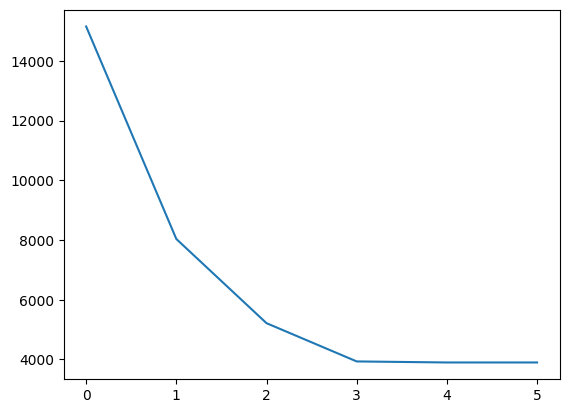

In [6]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>
Final costs for each number of clusters: <br>
2 clusters: 16383.144348505946 <br>
3 clusters: 9871.656837404622<br>
4 clusters: 3899.216693753842<br>
6 clusters: 3212.7521115054897<br>
8 clusters: 2574.3001464753415<br>
10 clusters: 2079.5999060879217<br>
20 clusters: 1142.6937003430887<br>

Now write a code that plots the clusters and the locations of the centroids at each iteration


Final costs for each number of clusters:
2 clusters: 16383.144348505946
3 clusters: 9871.656837404622
4 clusters: 3899.216693753842
6 clusters: 3212.7521115054897
8 clusters: 2574.3001464753415
10 clusters: 2079.5999060879217
20 clusters: 1142.6937003430887


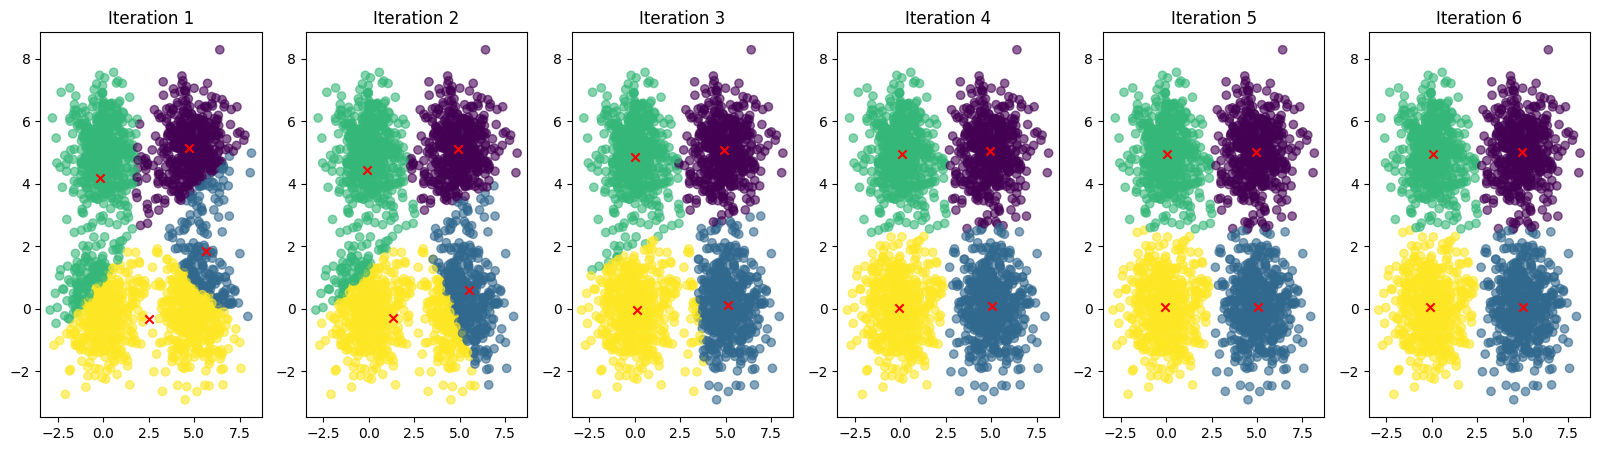

In [10]:
########################
#### YOUR CODE HERE ####
########################
# List of cluster counts to test
n_clusters_list = [2, 3, 4, 6, 8, 10, 20]

# Dictionary to store the final cost for each number of clusters
final_costs = {}

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    final_costs[n_clusters] = kmeans.costs[-1]
    ##print(f"{n_clusters} clusters: {kmeans.costs[-1]}")

# Now you can print the results in the required format
print("\nFinal costs for each number of clusters:")
for n_clusters, cost in final_costs.items():
    print(f"{n_clusters} clusters: {cost}")


def plot_kmeans_progress(kmeans, X, iterations_to_plot):
    fig, axs = plt.subplots(1, len(iterations_to_plot), figsize=(20, 5))
    
    for idx, iteration in enumerate(iterations_to_plot):
        if iteration >= len(kmeans.centroids_history):
            continue
        axs[idx].clear()
        # Plot data points
        axs[idx].scatter(X[:, 0], X[:, 1], c=kmeans.labels_history[iteration], cmap='viridis', alpha=0.6)
        # Plot centroids
        centroids = kmeans.centroids_history[iteration]
        axs[idx].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
        axs[idx].set_title(f'Iteration {iteration+1}')
    plt.show()

# Example usage to plot the progress of KMeans
n_clusters = 4  # Change this to test different numbers of clusters
iterations_to_plot = [0,1,2,3,4,5]  # Iterations to plot
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
plot_kmeans_progress(kmeans, X, iterations_to_plot)

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [15]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None
        self.mean = None

    def fit(self, X):
        #### YOUR CODE HERE ####
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.V = eigenvectors[:, sorted_indices]
    def transform(self, X, n_dimentions):
        #### YOUR CODE HERE ####
        X_centered = X - self.mean
        X_reduced = np.dot(X_centered, self.V[:, :n_dimentions])
        return X_reduced



Run the algorithm on MNIST dataset.

In [26]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

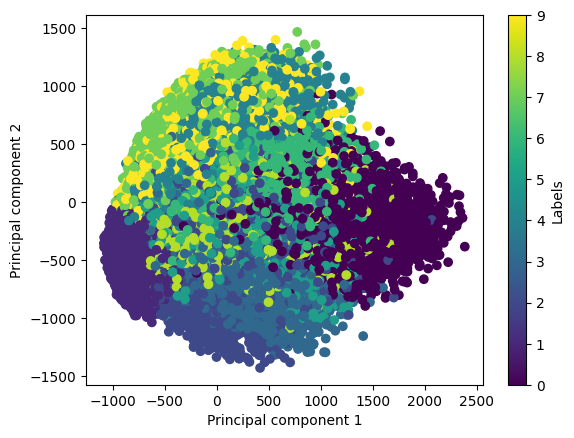

In [25]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

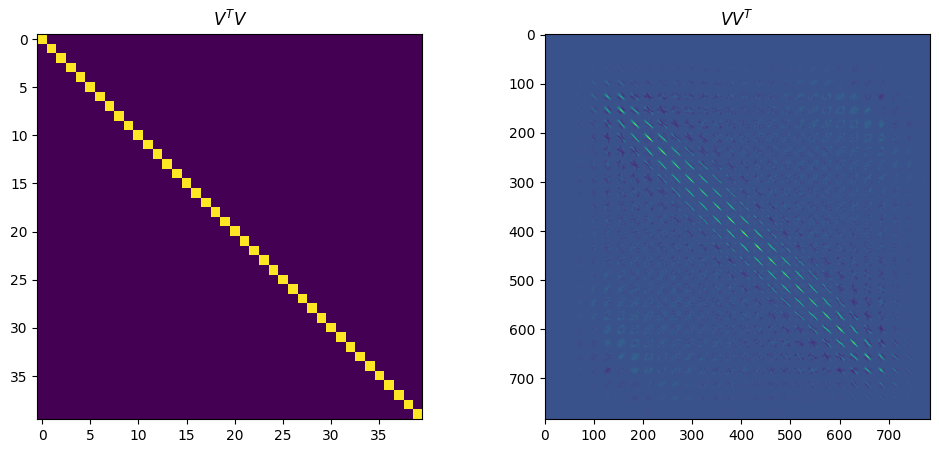

In [31]:
########################
#### YOUR CODE HERE ####
########################
def plot_matrices(V):
    # Calculate V^T V and V V^T
    V_TV = np.dot(V.T, V)
    VV_T = np.dot(V, V.T)

    # Plotting the matrices
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].imshow(V_TV, cmap='viridis')
    ax[0].set_title(r'$V^T V$')

    ax[1].imshow(VV_T, cmap='viridis')
    ax[1].set_title(r'$V V^T$')

    plt.show()




# Replace this with your actual V matrix from PCA
plot_matrices(pca.V[:, :40])

Your Explanation: <br>
    $V^T V$ is an identity matrix if V is orthonormal. It shows the orthonormality of the eigenvectors. <br>
    $V V^T$ is a projection matrix. It projects vectors onto the subspace spanned by the columns of V. <br>

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [54]:
def pca_reconstruction(x, n_dimentions):
    #### YOUR CODE HERE ####
    #x_projected = pca.transform(x, n_dimentions)
    x_projected = pca.transform(np.array([x]), n_dimentions)
    x_reconstructed = np.dot(x_projected, pca.V[:, :n_dimentions].T) + pca.mean
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


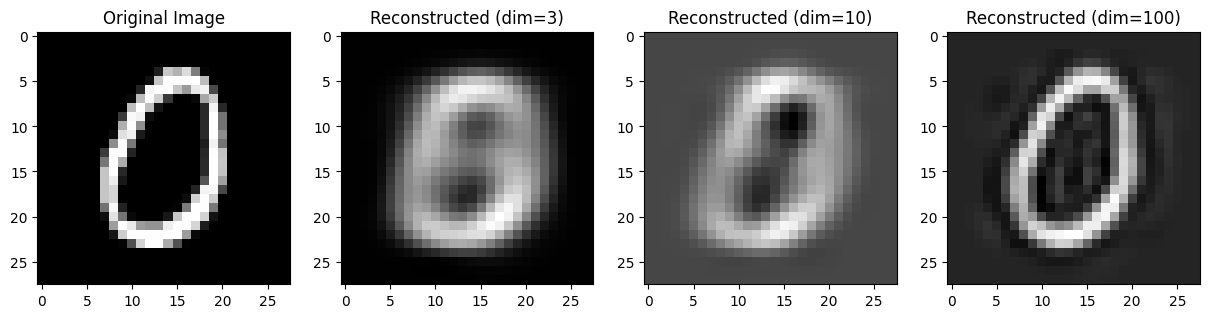

In [56]:
########################
#### YOUR CODE HERE ####
########################
sample_idx = np.random.randint(X.shape[0])
original_image = X[sample_idx]
dimensions = [3, 10, 100]# Plot the original and reconstructed images
fig, axes = plt.subplots(1, len(dimensions) + 1, figsize=(15, 5))

# Plot original image
axes[0].imshow(original_image.reshape(28, 28), cmap='gray')
axes[0].set_title('Original Image')

# Plot reconstructed images
for i, dim in enumerate(dimensions):
    reconstructed_image = pca_reconstruction(original_image, dim)
    axes[i + 1].imshow(reconstructed_image.reshape(28, 28), cmap='gray')
    axes[i + 1].set_title(f'Reconstructed (dim={dim})')